# IMDB Review Classifier

In [4]:
import pandas as pd              # Data Manipulation
import numpy as np               # Numerical computation
import seaborn as sns            # Visualisations
import matplotlib.pyplot as plt  # Visualisation Tools
import datetime                  # Functions related to date and time

In [5]:
colnames=['Review','Sentiment']
df = pd.read_csv('C:/Users/hp/Downloads/imdb.txt',sep='\t', names=colnames,header=None)
print(df)
df.isnull().sum()

                                                Review  Sentiment
0    A very, very, very slow-moving, aimless movie ...          0
1    Not sure who was more lost - the flat characte...          0
2    Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of.            0
4    The best scene in the movie was when Gerardo i...          1
5    The rest of the movie lacks art, charm, meanin...          0
6                                  Wasted two hours.            0
7    Saw the movie today and thought it was a good ...          1
8                                 A bit predictable.            0
9    Loved the casting of Jimmy Buffet as the scien...          1
10                And those baby owls were adorable.            1
11   The movie showed a lot of Florida at it's best...          1
12   The Songs Were The Best And The Muppets Were S...          1
13                                   It Was So Cool.            1
14   This 

Review       0
Sentiment    0
dtype: int64

In [6]:
df.head(7)                    #Prints first 7 rows from dataset

,Review,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0


In [8]:
df.tail(7)                    #Prints last 7 rows from dataset

,Review,Sentiment
741,It looked like a wonderful story.,1
742,I never walked out of a movie faster.,0
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0
747,All in all its an insult to one's intelligence...,0


In [9]:
df['Sentiment'].value_counts()    #Counts the occourance of each catagory

1    386
0    362
Name: Sentiment, dtype: int64

In [10]:
df.shape

(748, 2)

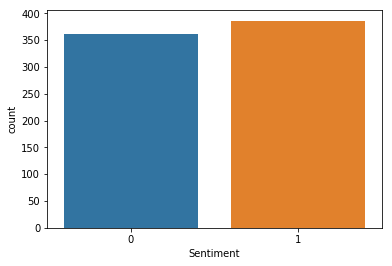

In [11]:
sns.countplot(x='Sentiment', data=df)

In [52]:
df.duplicated()  # Checking for duplicacy.

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
718    False
719    False
720    False
721    False
722    False
723    False
724    False
725    False
726    False
727    False
728    False
729    False
730    False
731    False
732    False
733    False
734    False
735    False
736    False
737    False
738    False
739    False
740    False
741    False
742    False
743    False
744    False
745    False
746    False
747    False
Length: 748, dtype: bool

In [53]:
dupli=df.duplicated()  
dupli.value_counts()

False    745
True       3
dtype: int64

In [12]:
x = df.Review       
y = df.Sentiment

In [21]:
# Preparing Vocabulory from the Training set and also Vectorising the Training set.
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer( stop_words = ['english'],ngram_range = [1,2]) 
x_train_vectorised = vectoriser.fit_transform(x_train.values.astype('U'))
print(x_train_vectorised.shape)

# Vectorising the test set
x_test_vectorised = vectoriser.transform(x_test)
print(x_test_vectorised.shape)

(523, 9837)
(225, 9837)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(523,)
(225,)
(523,)
(225,)


In [23]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(x_train,y_train)
print("y_intercept:",regressor.intercept_)
print("slope:",regressor.coef_)

y_pred = regressor.predict(x_test)
data=pd.DataFrame({'actual':y_test,'predicted':y_pred})
print(data)

ValueError: could not convert string to float: 'The two main characters may be two of the most believable children I ever saw put on screen.  '

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# making skeletal model
classifier = MultinomialNB()                         
# Set of parameters we want to try for out Model
parameters = { 'alpha' : [0.13,0.15,0.17]}

#Running the Model with above chosen parameter
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters , scoring = 'accuracy', cv = 5, n_jobs = -1 , verbose = 2)
grid_scores = grid_search.fit(x_train_vectorised , y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.3s finished


In [71]:
print( grid_search.best_score_)
print(grid_search.best_params_)

0.7553516819571865
{'alpha': 0.13}


In [73]:
 #Making the Final Classification model.
import datetime 
classifier = MultinomialNB( alpha = 0.15)
tick =datetime.datetime.now()
classifier.fit(x_train_vectorised, y_train)
tock=datetime.datetime.now()
lr_train_time = tock - tick
print("Time taken for training MultinimialNB model is model = " + str(lr_train_time))

Time taken for training MultinimialNB model is model = 0:00:00.004000


In [76]:
tick=datetime.datetime.now()
result = classifier.predict(x_test_vectorised)
tock=datetime.datetime.now()
lr_pred_train_time = tock - tick
print('Time taken to predict the data points in the Test set is : ' + str(lr_pred_train_time))

Time taken to predict the data points in the Test set is : 0:00:00


In [74]:
k = classifier.score(x_train_vectorised, y_train)
print('the Accuracy on the Training set comes out to be : ' + str(k))

the Accuracy on the Training set comes out to be : 1.0


In [77]:
import sklearn.metrics as skm
print(skm.classification_report( y_test ,result  ))

             precision    recall  f1-score   support

          0       0.91      0.80      0.85        51
          1       0.80      0.91      0.85        43

avg / total       0.86      0.85      0.85        94

